# Load Data 

memanggil data csv yang akan digunakan

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [54]:
train = pd.read_csv('bank-additional.csv', sep=';', header=0)

In [55]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [57]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Missing Values

In [58]:
print("Train Data:")
print(train.isnull().sum(), "\n")

Train Data:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 



In [59]:
train.fillna(train.mean(),inplace=True) 
train.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [60]:
train.job.fillna(train.job.mode()[0],inplace=True)
train.contact.fillna(train.contact.mode()[0],inplace=True)
train.education.fillna(train.education.mode()[0],inplace=True) 
train.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [61]:
train.campaign=np.log(train.campaign)

In [18]:
X=train.drop('loan',1)
y=train.loan

In [19]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)

In [20]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,30,487,0.693147,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,1,0,0,0,0,0,1,0,1,0
1,39,346,1.386294,999,0,1.1,93.994,-36.4,4.855,5191.0,...,1,0,0,0,0,0,1,0,1,0
2,25,227,0.000000,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,1,0,1,0,1,0
3,38,17,1.098612,999,0,1.4,94.465,-41.8,4.959,5228.1,...,1,0,0,0,0,0,1,0,1,0
4,47,58,0.000000,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,1,0,0,0,0,1,0,1,0


In [21]:
y.head()

0         no
1         no
2         no
3    unknown
4         no
Name: loan, dtype: object

# Split Data

membuat data test dan data training

In [1]:
from sklearn.model_selection import train_test_split
x_train, x_cc, y_train, y_cv = train_test_split(X, y, test_size=0.2)

print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_cv.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_cv.shape)

ValueError: At least one array required as input

# Modelling

In [119]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

# Logistic Regression

untuk memprediksi probabilitas sampel

In [23]:
#(a)LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(x_train,y_train)

C:\Users\bri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred_cv=model.predict(x_cv)

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.7936893203883495
[[654   0   0]
 [ 18   0   0]
 [152   0   0]]


# Decision Tree 

In [81]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [85]:
pred_cv=model.predict(x_cv)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8143203883495146
[[671   0   0]
 [ 21   0   0]
 [132   0   0]]


# Random Forest Algorithm 

In [29]:
#(c)RANDOM FOREST ALGORITHM

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
pred_cv2=rf.predict(x_cv)

In [31]:
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.8106796116504854
[[648   0   6]
 [  0  18   0]
 [150   0   2]]


# Support Vector Machine

In [32]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM

from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [33]:
pred_cv3=svm_model.predict(x_cv)

In [34]:
print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.7936893203883495
[[654   0   0]
 [ 18   0   0]
 [152   0   0]]


# Naive Bayes

In [35]:
#(e)NAIVE BAYES ALGORITHM

from sklearn.naive_bayes import GaussianNB 
nb=GaussianNB()
nb.fit(x_train,y_train)

pred_cv4=nb.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.5594660194174758
[[388   0 266]
 [  0  18   0]
 [ 97   0  55]]


# K-Nearest Neighbor

In [74]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM

from sklearn.neighbors import KNeighborsClassifier
kNN=KNeighborsClassifier()
kNN.fit(x_train,y_train)

pred_cv5=kNN.predict(x_cv)

print(accuracy_score(y_cv,pred_cv5))
matrix5=confusion_matrix(y_cv,pred_cv5)
print(matrix5)

0.7961165048543689
[[652   0  23]
 [ 21   0   1]
 [123   0   4]]


# ALL ACCURACY

akurasi dilakukan dengan menggunakan confusion matrix

In [37]:
print("Logistic Regression:", accuracy_score(y_cv,pred_cv))
print("Decision Tree:", accuracy_score(y_cv,pred_cv1))
print("Random Forest:", accuracy_score(y_cv,pred_cv2))
print("SVM:", accuracy_score(y_cv,pred_cv3))
print("Naive Bayes:", accuracy_score(y_cv,pred_cv4))
print("KNN:", accuracy_score(y_cv,pred_cv5))

Logistic Regression: 0.7936893203883495
Decision Tree: 0.7014563106796117
Random Forest: 0.8106796116504854
SVM: 0.7936893203883495
Naive Bayes: 0.5594660194174758
KNN: 0.7754854368932039


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

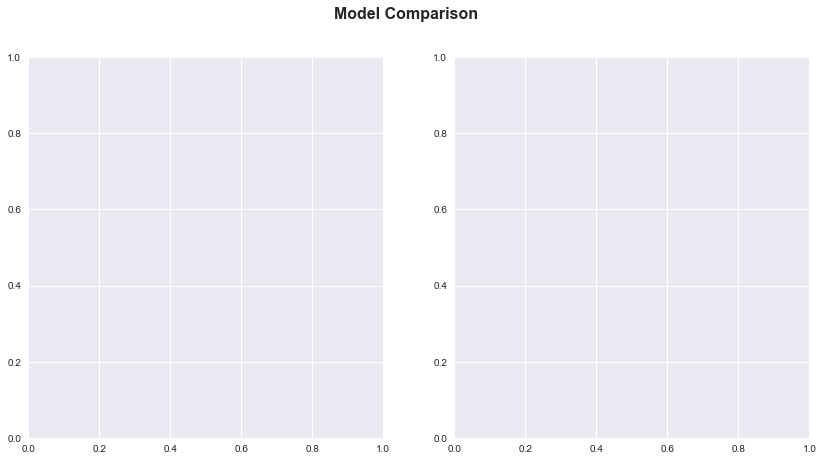

In [118]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')


# First plot
## set bar size
barWidth = 0.2
dtc_score = [pred_cv1['accuracy_score']]
rf_score = [pred_cv2['accuracy_score']]
svm_score = [pred_cv3['accuracy_score']]
nb_score = [pred_cv4['accuracy_score']]
knn_score = [pred_cv5['accuracy_score']]


## Set position of bar on X axis
r1 = np.arange(len(pred_cv1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, pred_cv1, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, pred_cv2, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, pred_cv3, width=barWidth, edgecolor='white', label='Support Vector Machine')
ax1.bar(r4, pred_cv4, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, pred_cv5, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')



## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(pred_cv1['fpr'], pred_cv1['tpr'], label='Decision Tree, auc = {:0.5f}'.format(pred_cv1['auc']))
ax2.plot(pred_cv2['fpr'], pred_cv2['tpr'], label='Random Forest, auc = {:0.5f}'.format(pred_cv2['auc']))
ax2.plot(pred_cv3['fpr'], pred_cv3['tpr'], label='Support Vector Machine, auc = {:0.5f}'.format(pred_cv3['auc']))
ax2.plot(pred_cv4['fpr'], pred_cv4['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(pred_cv4['auc']))
ax2.plot(pred_cv5['fpr'], pred_cv5['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(pred_cv5['auc']))


## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Visualisasi plot

In [96]:
print(train.duplicated().value_counts()) # To check duplicated values

False    4119
dtype: int64


In [108]:
train._get_numeric_data().columns.tolist()

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

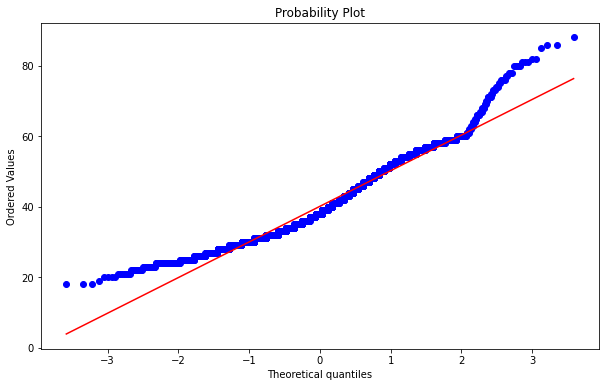

In [100]:
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(train["age"], dist="norm", plot=plt)
plt.show()

<AxesSubplot:>

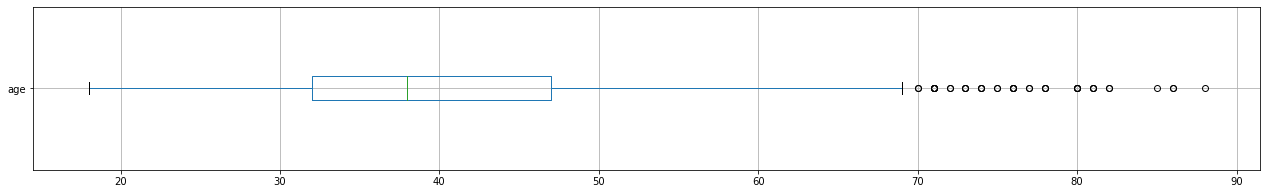

In [102]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(train, columns=['age'])
temp_df.boxplot(vert=False)

<AxesSubplot:>

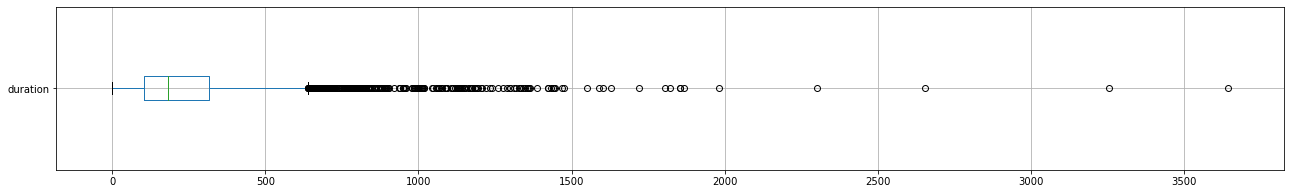

In [106]:
plt.rcParams["figure.figsize"] = (22, 3)
temp_df = pd.DataFrame(train, columns=['duration'])
temp_df.boxplot(vert=False)

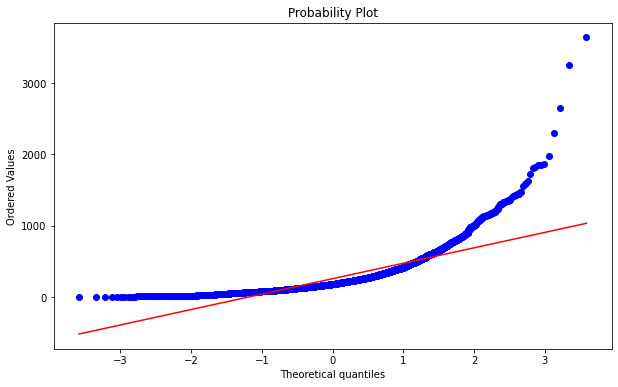

In [104]:
plt.rcParams["figure.figsize"] = (10, 6)
stats.probplot(train["duration"], dist="norm", plot=plt)
plt.show()